# Phân tích Doanh thu theo Nguồn Giới thiệu

Notebook này phân tích dữ liệu doanh thu từ các nguồn giới thiệu khác nhau trong file Excel `file xu li du lieu.xlsx`

In [2]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_palette('husl')

# Hiển thị tất cả các cột
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 1. Đọc và Khám phá Dữ liệu

In [3]:
# Đọc dữ liệu từ sheet 'table'
file_path = 'file xu li du lieu.xlsx'
df = pd.read_excel(file_path, sheet_name='table')

print(f"Kích thước dữ liệu: {df.shape}")
print(f"\nThông tin cơ bản:")
df.info()

Kích thước dữ liệu: (38, 4)

Thông tin cơ bản:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   noi gioi thieu  38 non-null     object 
 1   thang           38 non-null     object 
 2   so luong        38 non-null     float64
 3   doanh thu       38 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ KB


In [4]:
# Hiển thị 10 dòng đầu
print("10 dòng đầu tiên:")
df.head(10)

10 dòng đầu tiên:


,noi gioi thieu,thang,so luong,doanh thu
0,Bệnh viện Bà Rịa,2025 01,49.25,13711000
1,Bệnh viện Bà Rịa,2025 02,83.00,20381000
2,Bệnh viện Bà Rịa,2025 03,47.00,18402000
3,Bệnh viện Bà Rịa,2025 04,51.00,11613000
4,Bệnh viện Bà Rịa,2025 05,103.00,31898000
5,Bệnh viện Bà Rịa,2025 06,52.00,10585000
6,Bệnh viện đa khoa Quốc Tế Hoàn Mỹ Thủ Đức,2025 03,30.00,9043000
7,Bệnh viện đa khoa Quốc Tế Hoàn Mỹ Thủ Đức,2025 04,52.00,13273005
8,Bệnh viện đa khoa Quốc Tế Hoàn Mỹ Thủ Đức,2025 05,4.00,1047000
9,Bệnh viện đa khoa Quốc Tế Hoàn Mỹ Thủ Đức,2025 06,52.00,23926015


In [5]:
# Làm sạch tên cột
df.columns = df.columns.str.strip()
print("Tên các cột:")
print(df.columns.tolist())

# Kiểm tra dữ liệu thiếu
print("\nDữ liệu thiếu:")
print(df.isnull().sum())

Tên các cột:
['noi gioi thieu', 'thang', 'so luong', 'doanh thu']

Dữ liệu thiếu:
noi gioi thieu    0
thang             0
so luong          0
doanh thu         0
dtype: int64


## 2. Thống kê Mô tả

In [6]:
# Thống kê mô tả cho các cột số
print("Thống kê mô tả:")
df.describe()

Thống kê mô tả:


,so luong,doanh thu
count,38.000000,3.800000e+01
mean,101.006579,2.983372e+07
std,195.488581,4.346497e+07
min,1.000000,1.800000e+05
25%,18.250000,5.611250e+06
50%,37.500000,1.419550e+07
75%,75.250000,2.990500e+07
max,1035.000000,2.050842e+08


In [7]:
# Tổng quan về nguồn giới thiệu
print("Số lượng nguồn giới thiệu duy nhất:", df['noi gioi thieu'].nunique())
print("\nDanh sách các nguồn giới thiệu:")
print(df['noi gioi thieu'].unique())

Số lượng nguồn giới thiệu duy nhất: 10

Danh sách các nguồn giới thiệu:
['Bệnh viện Bà Rịa' 'Bệnh viện đa khoa Quốc Tế Hoàn Mỹ Thủ Đức'
 'Bệnh viện đa khoa Sài Gòn' 'Bệnh viện đa khoa Tâm Anh'
 'Bệnh viện đại học Y dược' 'Bệnh viện Nhân Dân Gia Định'
 'Bệnh viện Quận Bình Thạnh' 'Bệnh viện Quận Phú Nhuận'
 'Phòng Khám Hoàn Mỹ Tân Phú' 'Bệnh viện Hoàn Mỹ Bình Phước']


In [8]:
# Tổng quan về thời gian
print("Các tháng trong dữ liệu:")
print(sorted(df['thang'].unique()))

print("Số lượng bản ghi theo tháng:")
print(df['thang'].value_counts().sort_index())

Các tháng trong dữ liệu:
['2025 01', '2025 02', '2025 03', '2025 04', '2025 05', '2025 06']
Số lượng bản ghi theo tháng:
thang
2025 01    7
2025 02    4
2025 03    8
2025 04    6
2025 05    7
2025 06    6
Name: count, dtype: int64


## 3. Phân tích Doanh thu theo Nguồn Giới thiệu

In [9]:
# Tổng doanh thu theo nguồn giới thiệu
doanh_thu_theo_nguon = df.groupby('noi gioi thieu').agg({
    'so luong': 'sum',
    'doanh thu': 'sum'
}).sort_values('doanh thu', ascending=False)

print("Top 10 nguồn giới thiệu theo doanh thu:")
doanh_thu_theo_nguon.head(10)

Top 10 nguồn giới thiệu theo doanh thu:


,so luong,doanh thu
noi gioi thieu,,
Bệnh viện đại học Y dược,2600.00,641883426
Bệnh viện Hoàn Mỹ Bình Phước,269.00,107869015
Bệnh viện Bà Rịa,385.25,106590000
Phòng Khám Hoàn Mỹ Tân Phú,157.00,88333000
Bệnh viện Quận Bình Thạnh,120.00,69085006
Bệnh viện đa khoa Quốc Tế Hoàn Mỹ Thủ Đức,138.00,47289020
Bệnh viện Nhân Dân Gia Định,50.00,39494000
Bệnh viện Quận Phú Nhuận,40.00,14888000
Bệnh viện đa khoa Tâm Anh,58.00,12209026


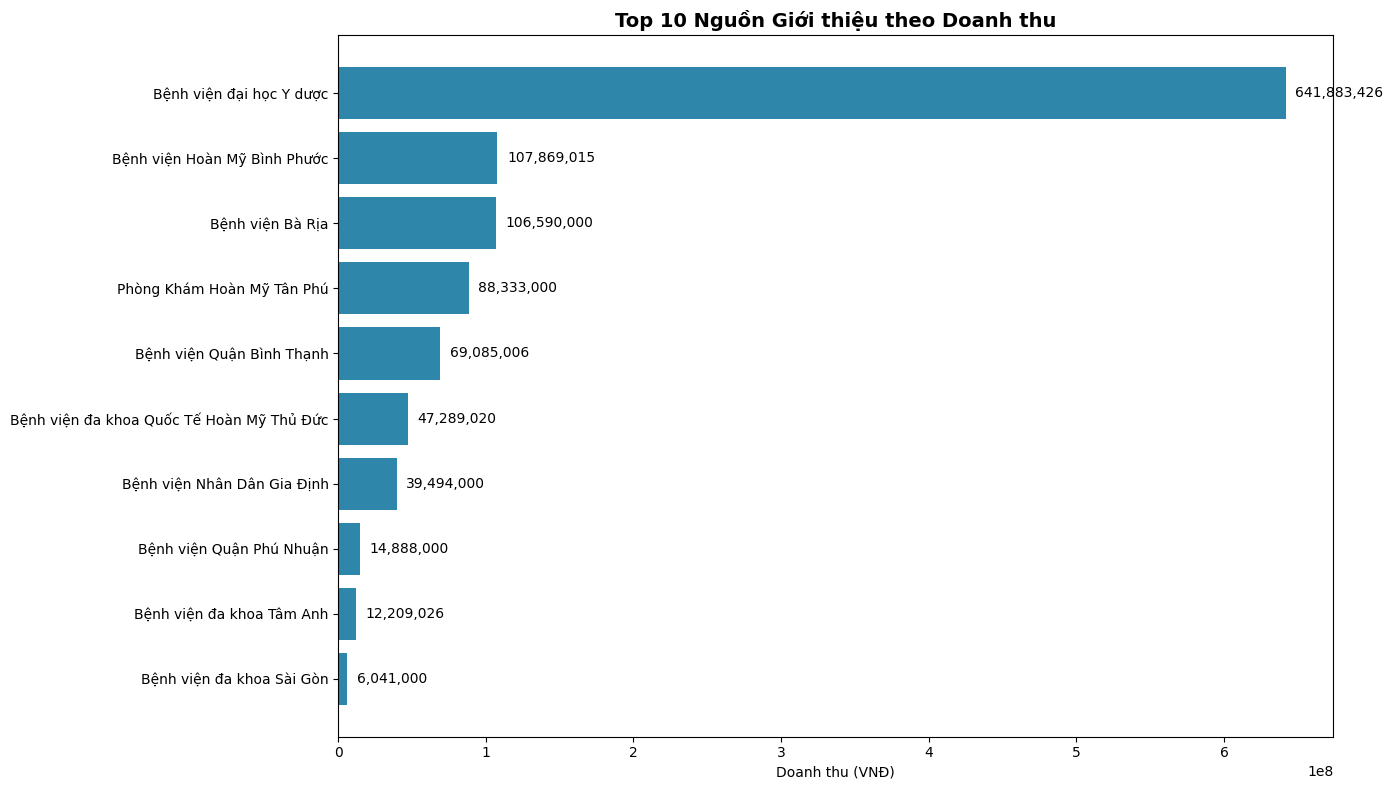

In [10]:
# Biểu đồ Top 10 nguồn giới thiệu theo doanh thu
plt.figure(figsize=(14, 8))
top_10_nguon = doanh_thu_theo_nguon.head(10)

plt.barh(range(len(top_10_nguon)), top_10_nguon['doanh thu'], color='#2E86AB')
plt.yticks(range(len(top_10_nguon)), [name[:50] + '...' if len(name) > 50 else name for name in top_10_nguon.index])
plt.xlabel('Doanh thu (VNĐ)')
plt.title('Top 10 Nguồn Giới thiệu theo Doanh thu', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Thêm giá trị trên thanh
for i, v in enumerate(top_10_nguon['doanh thu']):
    plt.text(v + max(top_10_nguon['doanh thu']) * 0.01, i, f'{v:,.0f}', va='center')

plt.tight_layout()
plt.show()

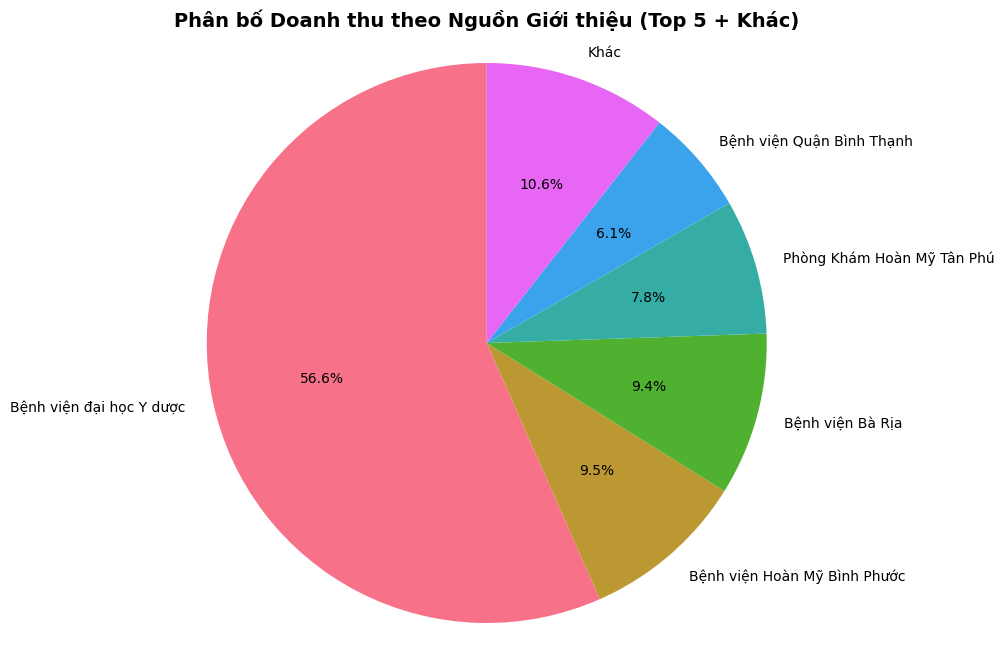

In [11]:
# Biểu đồ tròn cho Top 5 nguồn giới thiệu
plt.figure(figsize=(10, 8))
top_5_nguon = doanh_thu_theo_nguon.head(5)
others = doanh_thu_theo_nguon.iloc[5:]['doanh thu'].sum()

# Tạo dữ liệu cho biểu đồ tròn
labels = [name[:30] + '...' if len(name) > 30 else name for name in top_5_nguon.index]
labels.append('Khác')
sizes = list(top_5_nguon['doanh thu']) + [others]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố Doanh thu theo Nguồn Giới thiệu (Top 5 + Khác)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

## 4. Phân tích Xu hướng theo Thời gian

In [12]:
# Doanh thu theo tháng
doanh_thu_theo_thang = df.groupby('thang').agg({
    'so luong': 'sum',
    'doanh thu': 'sum'
}).sort_index()

print("Doanh thu theo tháng:")
doanh_thu_theo_thang

Doanh thu theo tháng:


,so luong,doanh thu
thang,,
2025 01,332.25,106322000
2025 02,263.00,110381000
2025 03,687.00,257215000
2025 04,439.00,182322026
2025 05,1276.00,274776278
2025 06,841.00,202665189


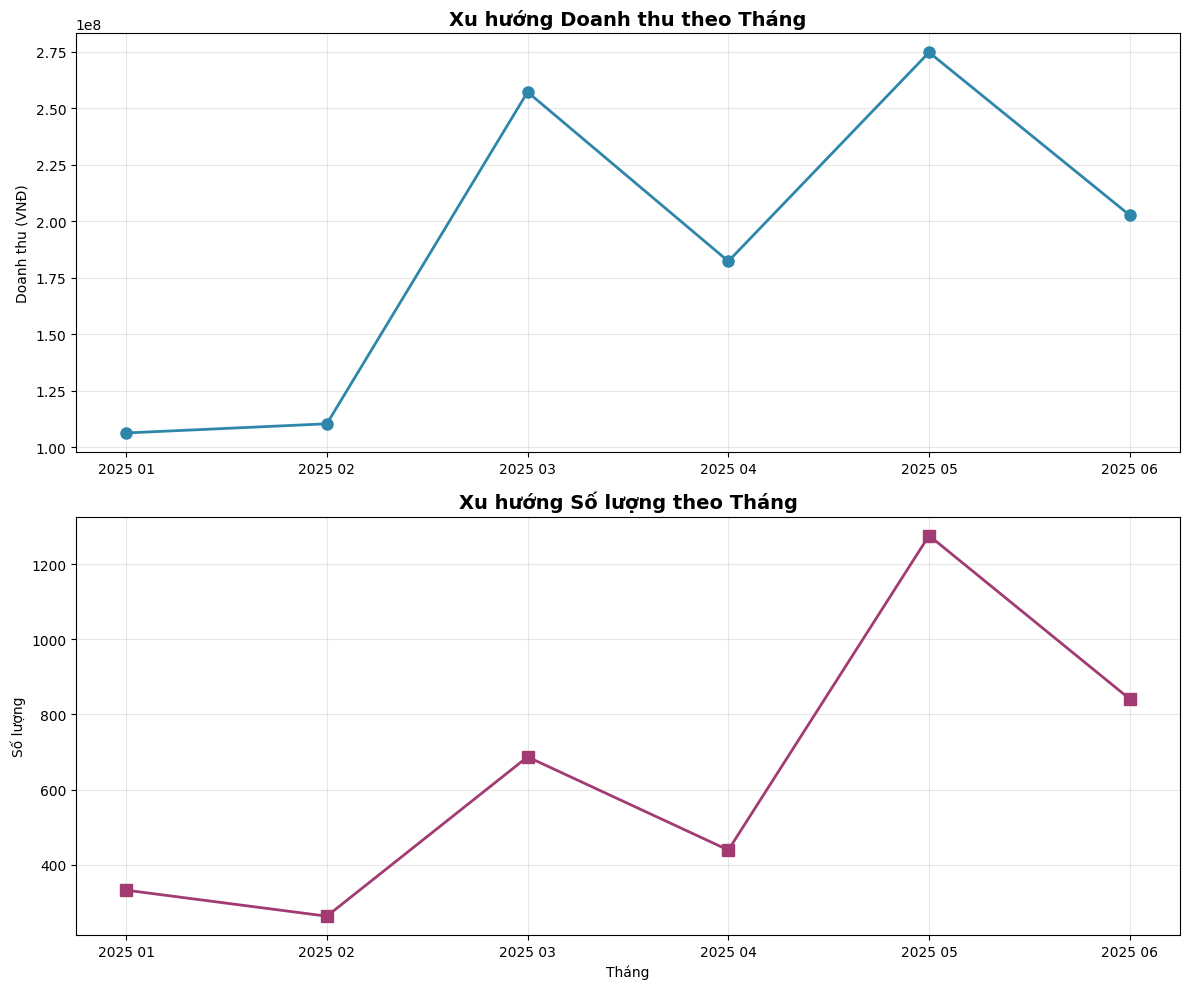

In [13]:
# Biểu đồ xu hướng doanh thu theo tháng
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Doanh thu theo tháng
ax1.plot(doanh_thu_theo_thang.index, doanh_thu_theo_thang['doanh thu'], 
         marker='o', linewidth=2, markersize=8, color='#2E86AB')
ax1.set_title('Xu hướng Doanh thu theo Tháng', fontsize=14, fontweight='bold')
ax1.set_ylabel('Doanh thu (VNĐ)')
ax1.grid(True, alpha=0.3)

# Số lượng theo tháng
ax2.plot(doanh_thu_theo_thang.index, doanh_thu_theo_thang['so luong'], 
         marker='s', linewidth=2, markersize=8, color='#A23B72')
ax2.set_title('Xu hướng Số lượng theo Tháng', fontsize=14, fontweight='bold')
ax2.set_xlabel('Tháng')
ax2.set_ylabel('Số lượng')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Phân tích Chi tiết theo Nguồn và Thời gian

In [14]:
# Tạo pivot table cho heatmap
pivot_doanh_thu = df.pivot_table(
    values='doanh thu', 
    index='noi gioi thieu', 
    columns='thang', 
    aggfunc='sum', 
    fill_value=0
)

# Chỉ lấy top 10 nguồn giới thiệu
top_10_names = doanh_thu_theo_nguon.head(10).index
pivot_top_10 = pivot_doanh_thu.loc[top_10_names]

print("Pivot table doanh thu (Top 10 nguồn):")
pivot_top_10

Pivot table doanh thu (Top 10 nguồn):


thang,2025 01,2025 02,2025 03,2025 04,2025 05,2025 06
noi gioi thieu,,,,,,
Bệnh viện đại học Y dược,40153000,63037000,153154000,61578021,205084232,118877173
Bệnh viện Hoàn Mỹ Bình Phước,0,0,51192000,0,15113014,41564001
Bệnh viện Bà Rịa,13711000,20381000,18402000,11613000,31898000,10585000
Phòng Khám Hoàn Mỹ Tân Phú,13995000,0,5167000,69171000,0,0
Bệnh viện Quận Bình Thạnh,18422000,4781000,14396000,21099000,7852006,2535000
Bệnh viện đa khoa Quốc Tế Hoàn Mỹ Thủ Đức,0,0,9043000,13273005,1047000,23926015
Bệnh viện Nhân Dân Gia Định,17132000,22182000,180000,0,0,0
Bệnh viện Quận Phú Nhuận,0,0,0,5588000,4122000,5178000
Bệnh viện đa khoa Tâm Anh,2549000,0,0,0,9660026,0


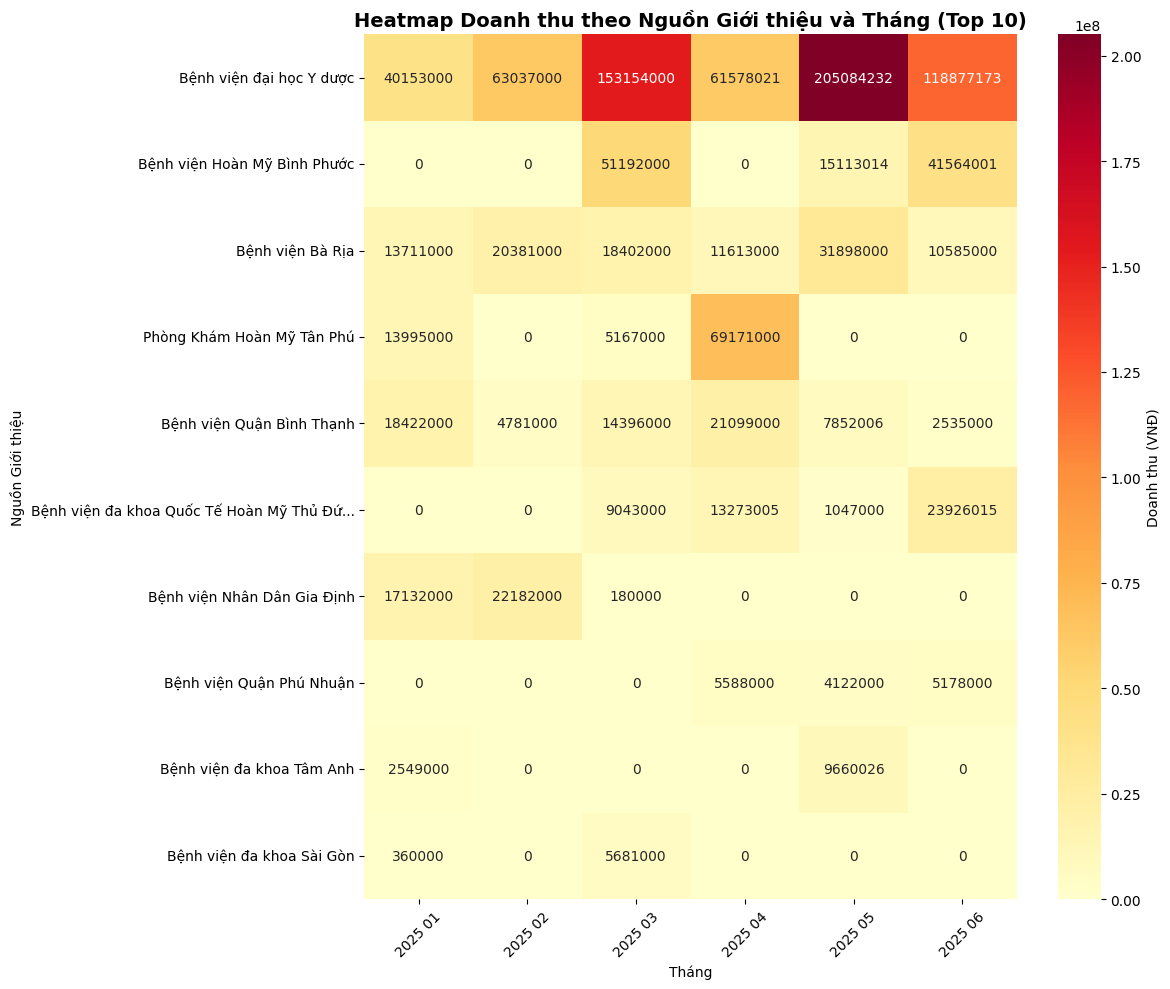

In [15]:
# Heatmap doanh thu theo nguồn và tháng
plt.figure(figsize=(12, 10))

# Rút ngắn tên nguồn giới thiệu
short_names = [name[:40] + '...' if len(name) > 40 else name for name in pivot_top_10.index]
pivot_display = pivot_top_10.copy()
pivot_display.index = short_names

sns.heatmap(pivot_display, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': 'Doanh thu (VNĐ)'})
plt.title('Heatmap Doanh thu theo Nguồn Giới thiệu và Tháng (Top 10)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Tháng')
plt.ylabel('Nguồn Giới thiệu')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 6. Phân tích Hiệu suất

In [16]:
# Tính doanh thu trung bình mỗi lượt
df['doanh_thu_tb_moi_luot'] = df['doanh thu'] / df['so luong']

# Phân tích hiệu suất theo nguồn
hieu_suat_nguon = df.groupby('noi gioi thieu').agg({
    'so luong': 'sum',
    'doanh thu': 'sum',
    'doanh_thu_tb_moi_luot': 'mean'
}).sort_values('doanh_thu_tb_moi_luot', ascending=False)

print("Top 10 nguồn theo doanh thu trung bình mỗi lượt:")
hieu_suat_nguon.head(10)

Top 10 nguồn theo doanh thu trung bình mỗi lượt:


,so luong,doanh thu,doanh_thu_tb_moi_luot
noi gioi thieu,,,
Bệnh viện Hoàn Mỹ Bình Phước,269.00,107869015,864129.694063
Bệnh viện Nhân Dân Gia Định,50.00,39494000,593427.609428
Bệnh viện Quận Bình Thạnh,120.00,69085006,566132.225233
Phòng Khám Hoàn Mỹ Tân Phú,157.00,88333000,540596.005423
Bệnh viện Quận Phú Nhuận,40.00,14888000,390131.313131
Bệnh viện đa khoa Quốc Tế Hoàn Mỹ Thủ Đức,138.00,47289020,319637.275641
Bệnh viện đại học Y dược,2600.00,641883426,281172.241540
Bệnh viện Bà Rịa,385.25,106590000,276072.494316
Bệnh viện đa khoa Tâm Anh,58.00,12209026,240182.804989


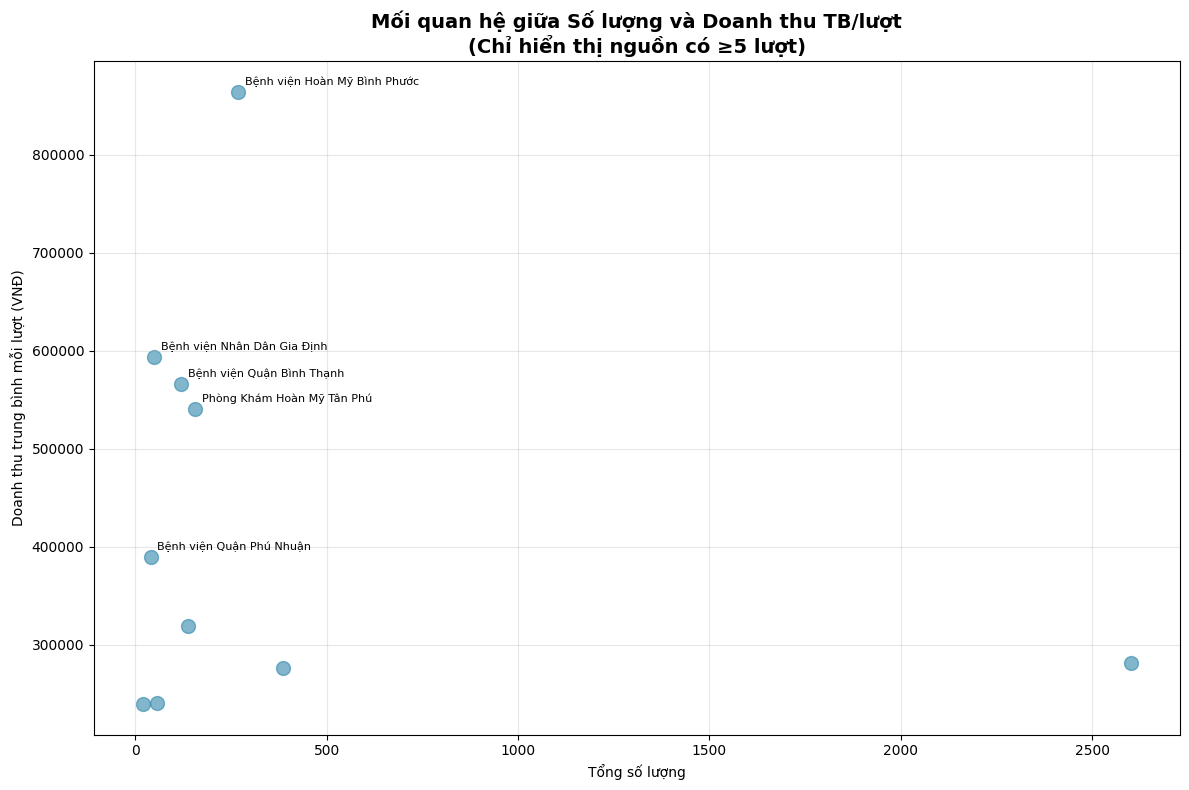

In [17]:
# Biểu đồ scatter: Số lượng vs Doanh thu trung bình
plt.figure(figsize=(12, 8))

# Chỉ hiển thị các nguồn có ít nhất 5 lượt
filtered_data = hieu_suat_nguon[hieu_suat_nguon['so luong'] >= 5]

plt.scatter(filtered_data['so luong'], filtered_data['doanh_thu_tb_moi_luot'], 
           s=100, alpha=0.6, color='#2E86AB')

plt.xlabel('Tổng số lượng')
plt.ylabel('Doanh thu trung bình mỗi lượt (VNĐ)')
plt.title('Mối quan hệ giữa Số lượng và Doanh thu TB/lượt\n(Chỉ hiển thị nguồn có ≥5 lượt)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Thêm tên cho một số điểm nổi bật
for idx, row in filtered_data.head(5).iterrows():
    plt.annotate(idx[:30] + '...' if len(idx) > 30 else idx, 
                (row['so luong'], row['doanh_thu_tb_moi_luot']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

## 7. Tóm tắt và Kết luận

In [18]:
# Tóm tắt các chỉ số quan trọng
print("=== TÓM TẮT PHÂN TÍCH DOANH THU ===")
print(f"Tổng doanh thu: {df['doanh thu'].sum():,.0f} VNĐ")
print(f"Tổng số lượng: {df['so luong'].sum():,.0f} lượt")
print(f"Doanh thu trung bình mỗi lượt: {df['doanh thu'].sum() / df['so luong'].sum():,.0f} VNĐ")
print(f"Số nguồn giới thiệu: {df['noi gioi thieu'].nunique()} nguồn")
print(f"Thời gian phân tích: {df['thang'].min()} - {df['thang'].max()}")

print("\n=== TOP 3 NGUỒN GIỚI THIỆU ===")
for i, (nguon, data) in enumerate(doanh_thu_theo_nguon.head(3).iterrows(), 1):
    print(f"{i}. {nguon}")
    print(f"   Doanh thu: {data['doanh thu']:,.0f} VNĐ ({data['doanh thu']/df['doanh thu'].sum()*100:.1f}%)")
    print(f"   Số lượng: {data['so luong']:,.0f} lượt")
    print()

=== TÓM TẮT PHÂN TÍCH DOANH THU ===
Tổng doanh thu: 1,133,681,493 VNĐ
Tổng số lượng: 3,838 lượt
Doanh thu trung bình mỗi lượt: 295,364 VNĐ
Số nguồn giới thiệu: 10 nguồn
Thời gian phân tích: 2025 01 - 2025 06

=== TOP 3 NGUỒN GIỚI THIỆU ===
1. Bệnh viện đại học Y dược
   Doanh thu: 641,883,426 VNĐ (56.6%)
   Số lượng: 2,600 lượt

2. Bệnh viện Hoàn Mỹ Bình Phước
   Doanh thu: 107,869,015 VNĐ (9.5%)
   Số lượng: 269 lượt

3. Bệnh viện Bà Rịa
   Doanh thu: 106,590,000 VNĐ (9.4%)
   Số lượng: 385 lượt



In [19]:
# Xuất báo cáo tóm tắt ra file Excel
with pd.ExcelWriter('bao_cao_phan_tich_doanh_thu.xlsx', engine='openpyxl') as writer:
    # Sheet 1: Tổng hợp theo nguồn
    doanh_thu_theo_nguon.to_excel(writer, sheet_name='Theo_Nguon')
    
    # Sheet 2: Tổng hợp theo tháng
    doanh_thu_theo_thang.to_excel(writer, sheet_name='Theo_Thang')
    
    # Sheet 3: Hiệu suất
    hieu_suat_nguon.to_excel(writer, sheet_name='Hieu_Suat')
    
    # Sheet 4: Pivot table
    pivot_doanh_thu.to_excel(writer, sheet_name='Pivot_Table')

print("Đã xuất báo cáo ra file: bao_cao_phan_tich_doanh_thu.xlsx")

Đã xuất báo cáo ra file: bao_cao_phan_tich_doanh_thu.xlsx
